In [1]:
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

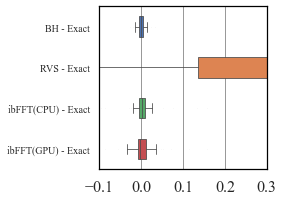

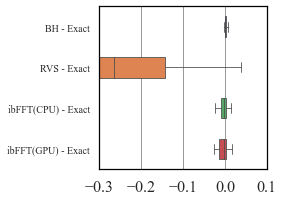

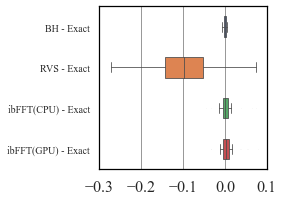

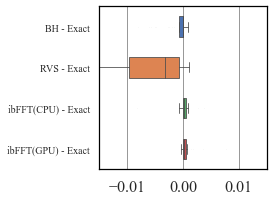

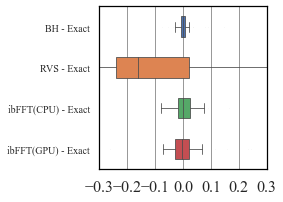

In [2]:
metrics = ["SE","NP1","NP2","EC","MA"]
yticks_set = [[-0.1,0,0.1,0.2,0.3],
          [-0.3,-0.2,-0.1,0.0,0.1],
         [-0.3,-0.2,-0.1,0.0,0.1],
         [-0.01,0.0,0.01],
         [-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3]]
xlim_l = [-0.1,-0.3,-0.3,-0.015,-0.3]
xlim_r = [0.3,0.1,0.1,0.015,0.3]
idx = 0
for m in metrics:
    df = pd.read_csv("./results/Approx_" + m + ".csv",index_col=0)[["Exact","BH","RVS","ibFFT-CPU","ibFFT-GPU"]]
    df = df.rename(columns={"ibFFT-CPU":"ibFFT(CPU)","ibFFT-GPU":"ibFFT(GPU)"})
#     df = df[:idx]
    diff_df = pd.DataFrame()
    diff_df["BH - Exact"] = (df["BH"] - df["Exact"]) / df["Exact"]
    diff_df["RVS - Exact"] = (df["RVS"] - df["Exact"]) / df["Exact"]
    diff_df["ibFFT(CPU) - Exact"] = (df["ibFFT(CPU)"] - df["Exact"]) / df["Exact"]
    diff_df["ibFFT(GPU) - Exact"] = (df["ibFFT(GPU)"] - df["Exact"]) / df["Exact"]
    
    
    plt.figure(figsize=(3,3))
    ax = plt.gca()
    # ax.set_yscale('log')

    ax.axis("on")
    # ax.yaxis.set_minor_locator(AutoMinorLocator())
#     ax.spines["right"].set_visible(True)
#     ax.spines["top"].set_visible(True)
#     ax.spines["bottom"].set_visible(True)
#     ax.spines["left"].set_visible(True)

    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")

    # yticks = [1e-2,5e-2,1e-1,5e-1,1.0]
    # yticks = [5e-3,1e-2,5e-2,1e-1,1.0]
    yticks = [-0.05,-0.04,-0.03,-0.02,-0.01,0.0,0.01,0.02,0.03,0.04,0.05]
    # ax.tick_params(which='major', length=10)
    ax.grid( which='major', color='grey',alpha=0.8)

    ax.grid( which='minor', color='grey', linestyle='--',alpha=0.2)

    box_plot  = sns.boxplot(data = diff_df,orient="h",saturation=1.0,fliersize=0.01,linewidth=0.8,width=0.5)



    lines = ax.get_lines()

    yticks = np.array([-0.1,-0.08,-0.06,-0.04,-0.02,0.0,0.02,0.04,0.06,0.08,0.10])/2*10
    ax.set_xticks(yticks_set[idx])
    plt.xlim(xlim_l[idx],xlim_r[idx])
    idx += 1
    # ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    plt.yticks(fontsize=10,fontname="Times New Roman")
    plt.xticks(fontsize=16,fontname="Times New Roman")

    plt.savefig("./Figs/Fig7ApproxRelativeBoxplot/" + m + ".svg")
    plt.show()